# Why Pandas?

Pandas is another package that provides data structures to aid in data analysis. As you will see, pandas has many similarities to numpy. This is largely because pandas actually wraps around numpy and adds additional functionality. 

On [Stack Overflow](https://stackoverflow.com/questions/11077023/what-are-the-differences-between-pandas-and-numpyscipy-in-python), Wes McKinney, the primary author of Pandas, answered a user's question on regarding the differences between Numpy and Pandas:

>"Indeed, pandas provides high level data manipulation tools built on top of NumPy. NumPy by itself is a fairly low-level tool, and will be very much similar to using MATLAB. pandas on the other hand provides rich time series functionality, data alignment, NA-friendly statistics, groupby, merge and join methods, and lots of other conveniences. It has become very popular in recent years in financial applications."

To summarize this, pandas provides the following functionality on top of numpy:
   
    1) Allows heterogenous data columns

    2) Label-based indexing that allows for convenient and efficient SQL-like joins, grouping, and index-alignment.

    3) Rich functionality for working with time series.



In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data

%matplotlib inline

## Core Data Structures

### Dataframe

The DataFrame is the core datastructure of pandas. It is basically analogous to a spreadsheet with rows and columns, but it comes with a lot of functionality that makes it very useful for data analysis. 

### Series

The pandas Series is similar to a DataFrame with the exception that it is only one-dimensional. In fact, one can think of a DataFrame as having columns made up of multiple Series.

In [17]:
series = pd.Series([1,2,3,5,1], index=['AAPL', 'GOOGL', 'INTC', 'QCOM', 'NVDA'])
series

AAPL     1
GOOGL    2
INTC     3
QCOM     5
NVDA     1
dtype: int64

In [38]:
np.random.seed(25)

df = pd.DataFrame({'a':np.random.randint(0,10,5), 
                   'b': [1,3.5,7,2,1],
                   'c': np.arange(5),
                  }, 
                  index=['A', 'B', 'C', 'D', 'E'])
df

,a,b,c
A,4,1.0,0
B,6,3.5,1
C,7,7.0,2
D,2,2.0,3
E,8,1.0,4


## Slicing and Indexing

Getting columns and rows of a dataframe is very similar to that of fetching data from lists and dictionaries in base python. Pandas provides two selection attributes to its data structures, iloc and loc, that allow the user to select rows and columns

   1) Slicing of dataframe with **\__getslice\__** automatically slices rows.
       - Ex: df[0:3] gets rows 0, 1, and 2.
   2) Indexing with **\__getitem\__** automatically gets the column with the given LABEL (will not work with integer index).
       - Ex: df['b'] will fetch the column labeled b.
   3) In slicing rows and/or columns with labels (start_label : end_label), pandas includes BOTH the start and end.
       - Ex: df.loc[:, 'a':'c']  will fetch all rows for columns 'a', columns 'c', and any columns between those two.
   4) In slicing rows and/or columns with integer indices (start : end), pandas follows the normal python practice of including the start index but NOT including the end index.
       - Ex: df.iloc[1:3, :]  will fetch all columns for rows 1 and 2.

In [8]:
# Slice Columns
df.loc[:,'a':'b']

,a,b
A,4,1.0
B,6,3.5
C,7,7.0
D,2,2.0
E,8,1.0


## Time Series Data

In [71]:
index = pd.DatetimeIndex(start='2016-01-01', periods=20, freq='m')
df = pd.DataFrame({'a': np.arange(20), 
                   'b': np.random.random(20), 
                   'c':['red']*15 + ['blue']*5,
                   'd': np.sin(10*np.pi*np.linspace(0,50,20)) + 2 * np.arange(20) },
                  index=index)
df.head()

,a,b,c,d
2016-01-31,0,0.377250,red,0.000000
2016-02-29,1,0.063457,red,2.837166
2016-03-31,2,0.373199,red,4.915773
2016-04-30,3,0.074116,red,6.164595
2016-05-31,4,0.044442,red,7.264276


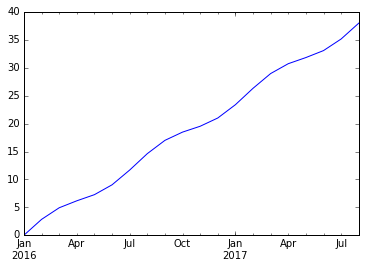

In [72]:
df.d.plot()

In [61]:
df.loc['2016-6':'2017', :]

,a,b,c,d
2016-06-30,5,0.766486,red,10.707107
2016-07-31,6,0.076742,red,12.809017
2016-08-31,7,0.331044,red,14.891007
2016-09-30,8,0.679852,red,16.951057
2016-10-31,9,0.509213,red,18.987688
2016-11-30,10,0.655146,red,21.000000
2016-12-31,11,0.602120,red,22.987688
2017-01-31,12,0.719055,red,24.951057
2017-02-28,13,0.415219,red,26.891007
2017-03-31,14,0.396542,red,28.809017


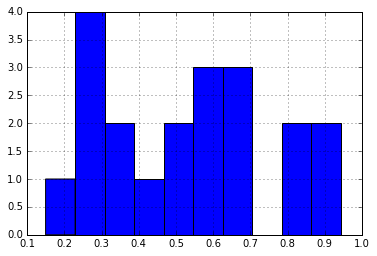

In [25]:
df.b.hist();

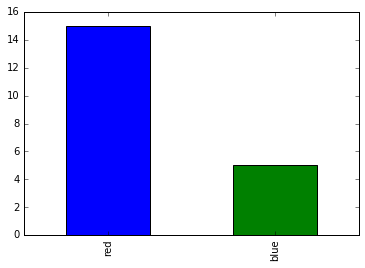

In [32]:
df.c.value_counts().plot(kind='bar')

## Portfolio Standard Devation

In [43]:
symbols = ['SPY', 'GLD', 'TLT', 'ACWX']
weights = pd.Series([0.4, 0.05, 0.3, 0.25 ], index=symbols)
prices = data.DataReader(symbols, 'yahoo', start='2008-04-01', end='2017-01-01')['Adj Close']

prices.sort_index(inplace=True)
prices.head()


,ACWX,GLD,SPY,TLT
Date,,,,
2008-04-01,41.184235,86.860001,111.954422,69.399727
2008-04-02,41.585171,89.269997,112.028183,69.547478
2008-04-03,41.954033,89.419998,112.306839,69.702713
2008-04-04,42.058277,90.250000,112.183899,70.338074
2008-04-07,42.266762,91.169998,112.241287,69.968643


In [45]:
returns = prices.pct_change(1)[1:]
returns.head()

,ACWX,GLD,SPY,TLT
Date,,,,
2008-04-02,0.009735,0.027746,0.000659,0.002129
2008-04-03,0.008870,0.001680,0.002487,0.002232
2008-04-04,0.002485,0.009282,-0.001095,0.009115
2008-04-07,0.004957,0.010194,0.000512,-0.005252
2008-04-08,-0.004743,-0.008994,-0.001022,-0.003484


In [50]:
cov_matrix = returns['2011':].cov()
cov_matrix.head()

,ACWX,GLD,SPY,TLT
ACWX,0.000137,0.000011,0.000099,-0.000053
GLD,0.000011,0.000119,-0.000002,0.000018
SPY,0.000099,-0.000002,0.000089,-0.000045
TLT,-0.000053,0.000018,-0.000045,0.000086


In [51]:
port_variance = weights.dot(cov_matrix).dot(weights)
std_dev = np.sqrt(port_variance)

std_dev*np.sqrt(252)

0.090699055213864746

In [32]:
np.diag(cov_matrix)*np.sqrt(252)

array([ 0.00407305,  0.00247456,  0.00284877,  0.00154113])